In [364]:
import pandas
train_data = pandas.read_csv('healthcare-dataset-stroke-data/train_2v.csv')
test_data = pandas.read_csv('healthcare-dataset-stroke-data/test_2v.csv')
train_data.head()
stroke_count =  train_data.groupby('stroke').size()
print(stroke_count)

stroke
0    42617
1      783
dtype: int64


In [365]:
print('The number of No Strokes are: ' + str(train_data['stroke'].value_counts()[0]) + ' which is ', round(train_data['stroke'].value_counts()[0]/len(train_data) * 100,2), '% of the dataset')
print('The number of Strokes are: ' + str(train_data['stroke'].value_counts()[1]) + ' which is ', round(train_data['stroke'].value_counts()[1]/len(train_data) * 100,2), '% of the dataset')


The number of No Strokes are: 42617 which is  98.2 % of the dataset
The number of Strokes are: 783 which is  1.8 % of the dataset


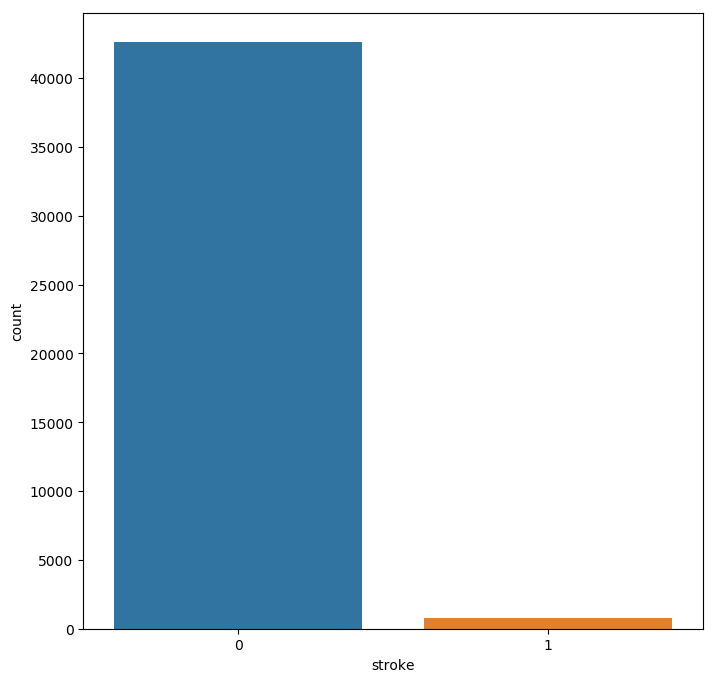

In [366]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot('stroke', data = train_data)

In [367]:
print(test_data.shape)
print(train_data.shape)

(18601, 11)
(43400, 12)


In [369]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
print(train_data.keys())
print(test_data.shape)
print(train_data.shape)

train_data['gender'] = number.fit_transform(train_data['gender'].astype('str'))
train_data['ever_married'] = number.fit_transform(train_data['ever_married'].astype('str'))
train_data['Residence_type'] = number.fit_transform(train_data['Residence_type'].astype('str'))
train_data['work_type'] = number.fit_transform(train_data['work_type'].astype('str'))
train_data['smoking_status'] = number.fit_transform(train_data['smoking_status'].astype('str'))

test_data['gender'] = number.fit_transform(test_data['gender'].astype('str'))
test_data['ever_married'] = number.fit_transform(test_data['ever_married'].astype('str'))
test_data['Residence_type'] = number.fit_transform(test_data['Residence_type'].astype('str'))
test_data['work_type'] = number.fit_transform(test_data['work_type'].astype('str'))
test_data['smoking_status'] = number.fit_transform(test_data['smoking_status'].astype('str'))

train_data1 = train_data.drop(['id'],axis=1)
test_data1 = test_data.drop(['id'],axis=1)

print(test_data1.shape)
print(train_data1.shape)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
(18601, 11)
(43400, 12)
(18601, 10)
(43400, 11)


In [370]:
train_data1 = train_data1.dropna()
test_data1 = test_data1.dropna()


In [371]:
print(test_data1.shape)
print(train_data1.shape)


(18010, 10)
(41938, 11)


In [372]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
y = train_data1.stroke
X = train_data1.drop('stroke', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

sm = SMOTE(random_state=12, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(np.bincount(y_train))
print(y_train)
shuffle(X_train, y_train)

[33042 33042]
[0 0 0 ... 1 1 1]


[array([[  0.29648771,  78.88946313,   0.        , ...,  97.669711  ,
          34.47386352,   2.        ],
        [  1.        ,  54.83762457,   0.        , ..., 154.26686116,
          30.47663345,   0.        ],
        [  0.        ,  71.05607558,   1.        , ..., 116.80046584,
          30.21775654,   1.02803779],
        ...,
        [  0.        ,  39.        ,   0.        , ...,  69.38      ,
          22.1       ,   1.        ],
        [  1.        ,  65.88370697,   0.94185348, ..., 102.53195657,
          33.95929744,   1.88370697],
        [  0.        ,  38.        ,   0.        , ...,  82.87      ,
          47.9       ,   2.        ]]), array([1, 1, 1, ..., 0, 1, 0])]

In [343]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
training_data = train_data1.iloc[:,:10]
training_labels = train_data1.iloc[:,-1]
training_data.head()

X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels, stratify=training_labels)

from imblearn.pipeline import make_pipeline
pipeline_smote = make_pipeline(SMOTE(), PCA(), LogisticRegressionCV())
pipeline_smote.fit(X_train, y_train)
pipeline_smote.predict(X_test)
print('Score pipeline:', pipeline_smote.score(X_test, y_test))

Score pipeline: 0.7561278016213638


In [344]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = smote.predict(X_test)
accuracy_score(y_test, smote_pred)


0.9846447305674774

In [345]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection
smote = DecisionTreeClassifier().fit(X_train, y_train)
smote_pred = smote.predict(X_test)
accuracy_score(y_test, smote_pred)

0.9671912255603242

In [346]:
import tensorflow as tf
from keras import optimizers
from keras import regularizers

In [347]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_dim=10, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.003), activity_regularizer=regularizers.l1(0.01)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [348]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [349]:
print(training_labels.shape)
print(training_dataset.head())
print(training_labels.head()) 
print(testing_dataset.head())
print(testing_labels.head())
history = model.fit(X_train, y_train , validation_split=0.33, epochs=50)
model.evaluate(X_test, y_test)

(41938,)
       gender   age  hypertension  heart_disease  ever_married  work_type  \
37664       1  47.0             0              0             0          2   
12763       0  56.0             0              0             1          0   
40757       0  16.0             0              0             0          4   
36391       0  38.0             0              0             1          2   
764         1   4.0             0              0             0          4   

       Residence_type  avg_glucose_level   bmi  smoking_status  
37664               1              95.62  25.7               3  
12763               1              55.69  22.0               2  
40757               0              72.69  25.9               1  
36391               0              92.13  22.3               2  
764                 0              89.11  20.1               1  
0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64
       gender   age  hypertension  heart_disease  ever_married  work_type  \

21073/21073 [==============================] - 1s 42us/step - loss: 0.0769 - acc: 0.9852 - val_loss: 0.0841 - val_acc: 0.9835
Epoch 47/50
21073/21073 [==============================] - 1s 43us/step - loss: 0.0769 - acc: 0.9852 - val_loss: 0.0841 - val_acc: 0.9835
Epoch 48/50
21073/21073 [==============================] - 1s 44us/step - loss: 0.0769 - acc: 0.9852 - val_loss: 0.0841 - val_acc: 0.9835
Epoch 49/50
21073/21073 [==============================] - 1s 42us/step - loss: 0.0769 - acc: 0.9852 - val_loss: 0.0841 - val_acc: 0.9835
Epoch 50/50
10485/10485 [==============================] - 0s 14us/step


[0.07937651486569038, 0.9846447305674774]

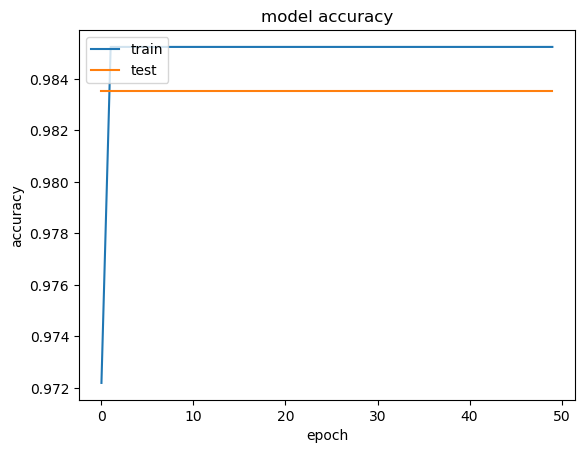

In [350]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

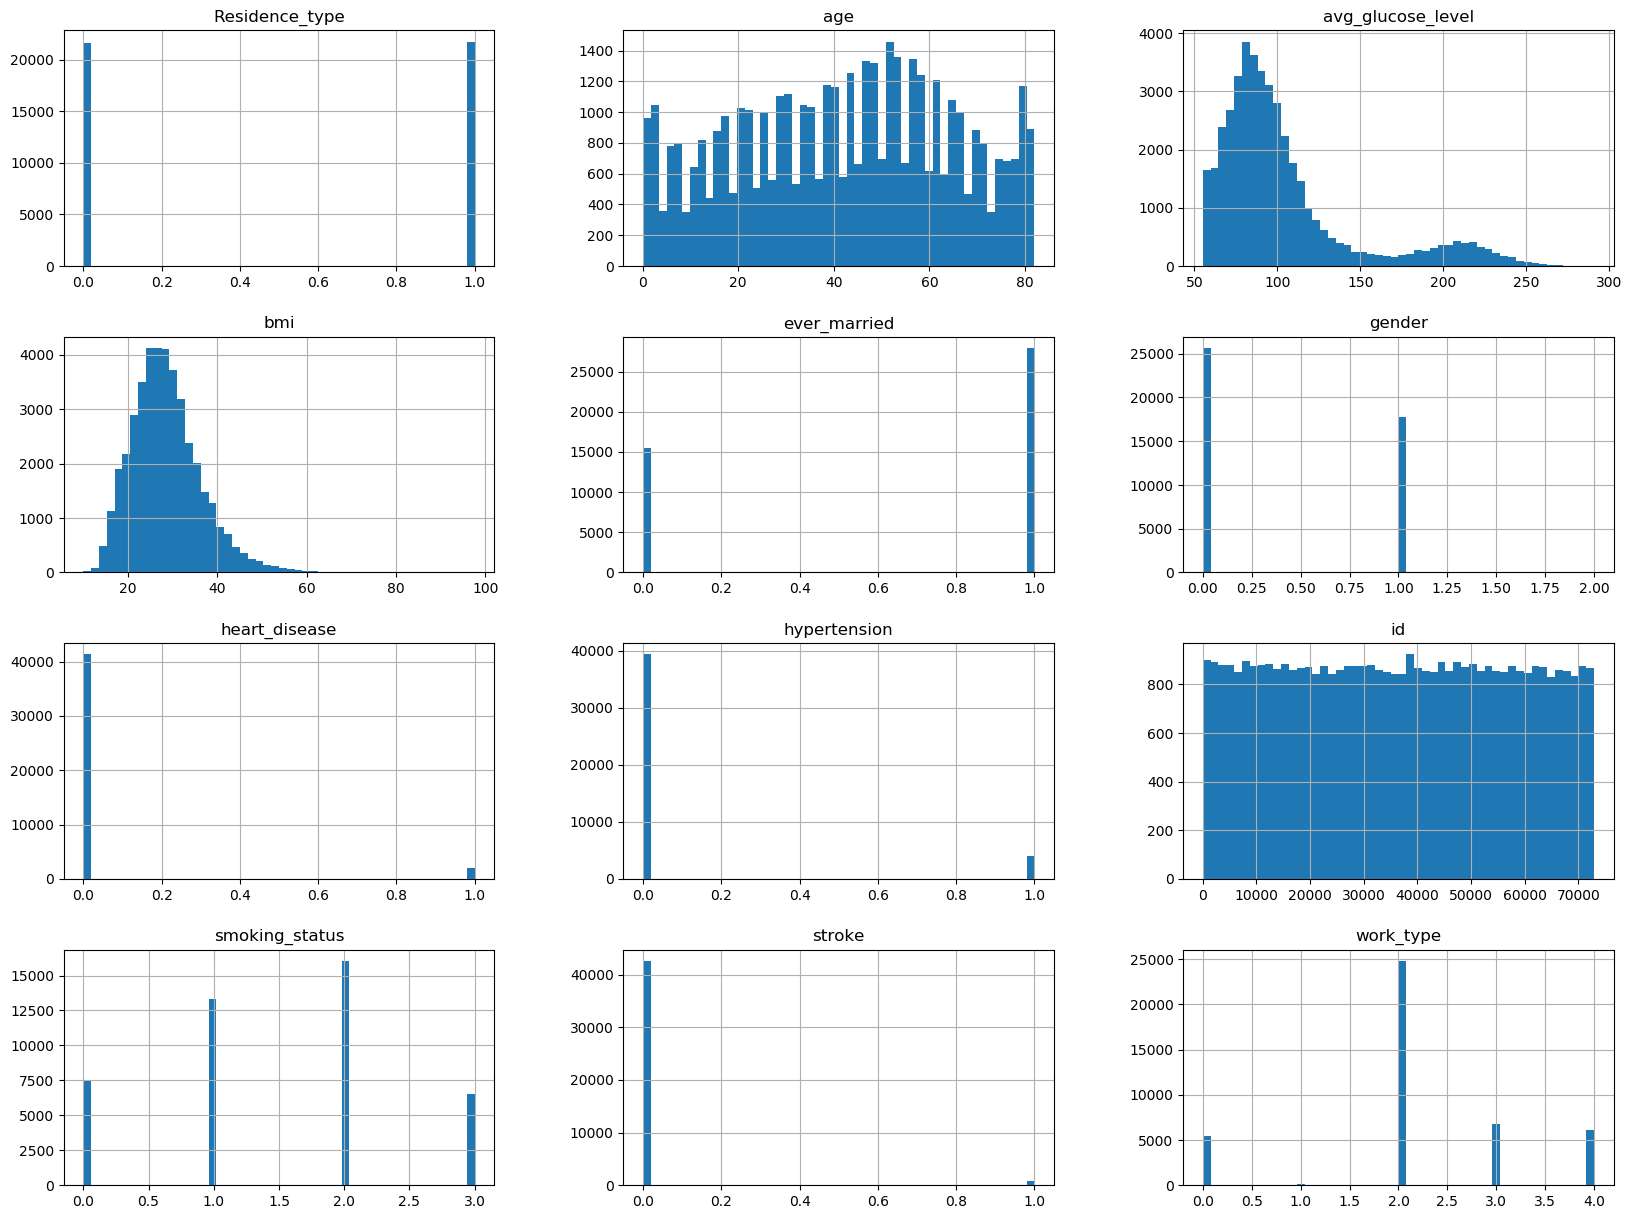

In [352]:
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [353]:
import pandas as pd
import numpy as np
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1,0.00165658,0.0127604,0.00657087,0.00923368,0.0102169,-0.0100524,0.000120356,0.0246343,0.018839,0.00838342,0.00297632
gender,0.00165658,1,-0.0279033,0.0237092,0.0820605,-0.0313509,0.0637392,0.00150774,0.0354653,-0.0219807,-0.0492887,0.0111983
age,0.0127604,-0.0279033,1,0.272169,0.250188,0.69307,-0.366664,0.00129867,0.237627,0.358897,0.0209764,0.156049
hypertension,0.00657087,0.0237092,0.272169,1,0.119777,0.176575,-0.0608003,-0.00312356,0.160211,0.161225,0.0122748,0.0753322
heart_disease,0.00923368,0.0820605,0.250188,0.119777,1,0.128833,-0.0218354,-0.00274264,0.146938,0.0576772,-0.0250632,0.113763
ever_married,0.0102169,-0.0313509,0.69307,0.176575,0.128833,1,-0.359848,0.00442176,0.153607,0.342281,0.0633397,0.0719195
work_type,-0.0100524,0.0637392,-0.366664,-0.0608003,-0.0218354,-0.359848,1,-0.00347304,-0.0593026,-0.323295,-0.140156,-0.0107999
Residence_type,0.000120356,0.00150774,0.00129867,-0.00312356,-0.00274264,0.00442176,-0.00347304,1,1.35017e-05,-0.00374907,0.00831813,0.00224689
avg_glucose_level,0.0246343,0.0354653,0.237627,0.160211,0.146938,0.153607,-0.0593026,1.35017e-05,1,0.191295,-0.00413536,0.0789171
bmi,0.018839,-0.0219807,0.358897,0.161225,0.0576772,0.342281,-0.323295,-0.00374907,0.191295,1,0.0675526,0.0202848


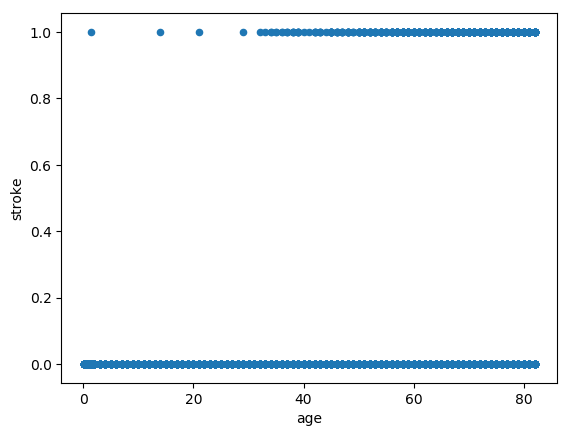

In [355]:
train_data.plot(kind="scatter", x="age", y="stroke")

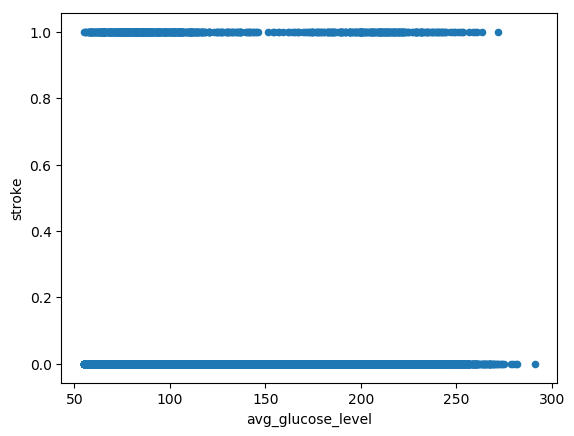

In [356]:
train_data.plot(kind="scatter", x="avg_glucose_level", y="stroke")

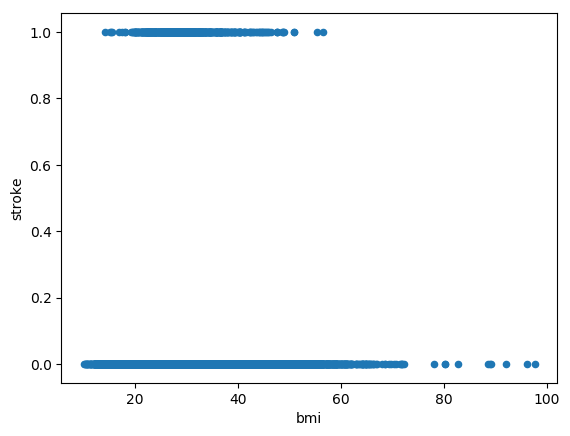

In [357]:
train_data.plot(kind="scatter", x="bmi", y="stroke")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5a327a90>,
      dtype=object)

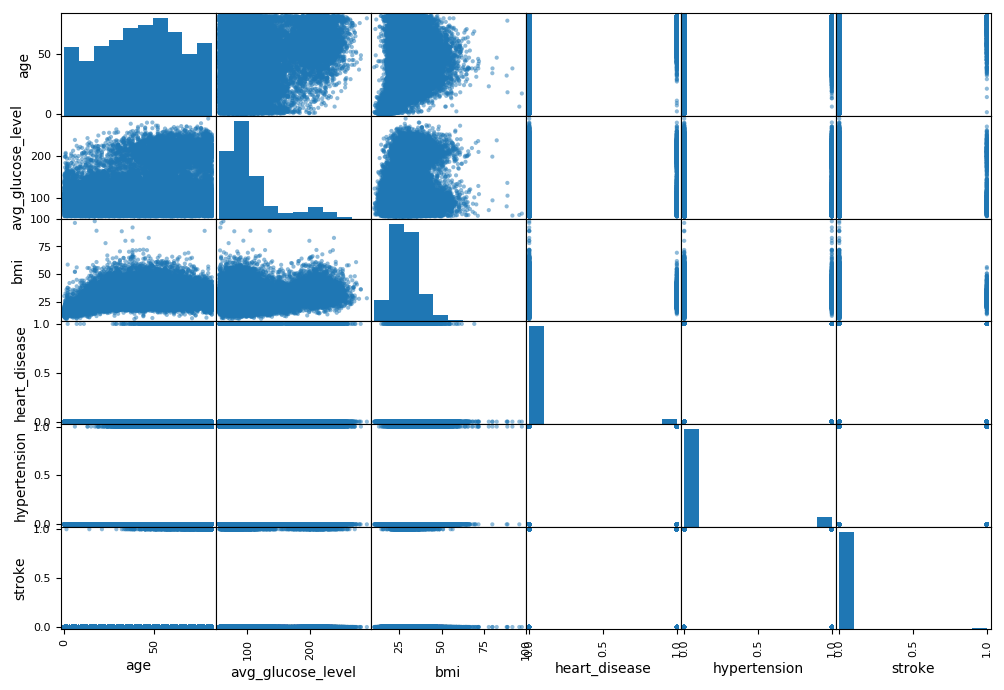

In [358]:
from pandas.plotting import scatter_matrix 
attributes = ['age', 'avg_glucose_level','bmi','heart_disease','hypertension','stroke']
scatter_matrix(train_data[attributes], figsize=(12,8))


In [359]:
clf.predict_proba(testing_dataset)
confusion_matrix(testing_labels,predicted_labels)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(testing_labels, predicted_labels)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.02


No handles with labels found to put in legend.


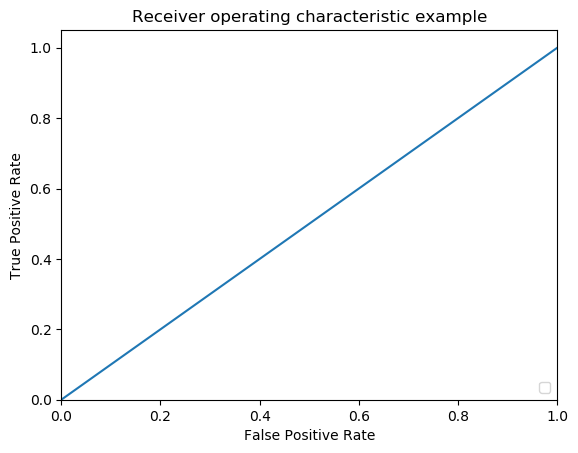

In [360]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(testing_labels, predicted_labels)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testing_labels.ravel(), predicted_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

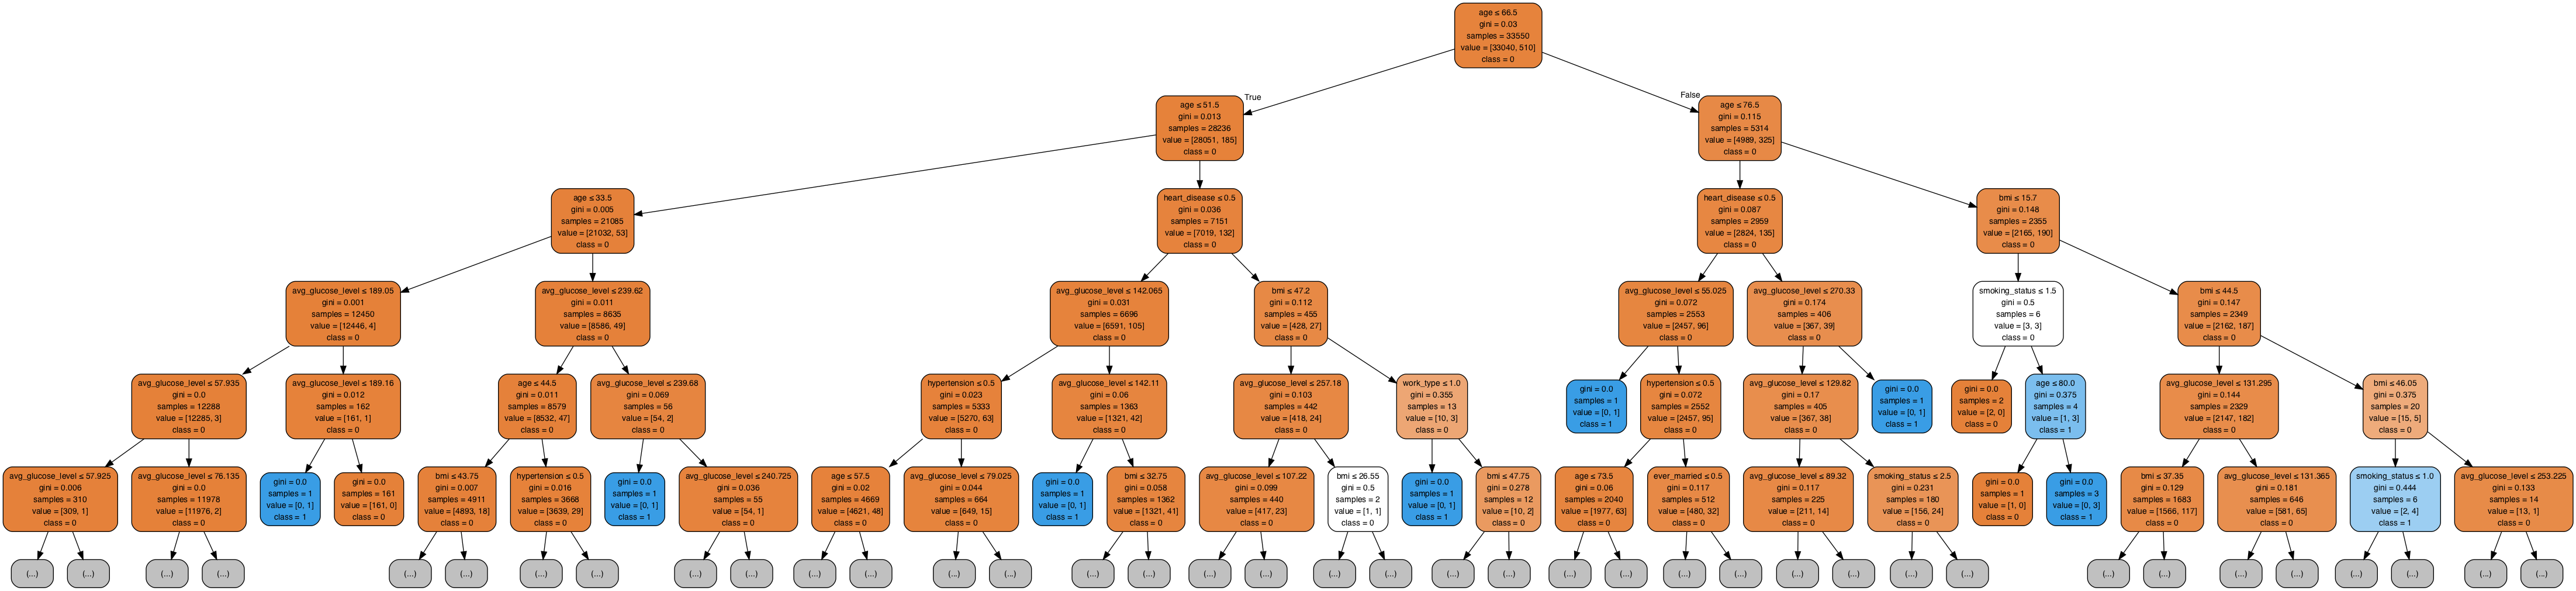

In [362]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_cols = ['gender', 'age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'],max_depth=5)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('stroke.png')
Image(graph.create_png())